### PHASES:

#### 1. problem & business understanding
    Problem statement

    Stakeholders

    Objectives

    Success metrics

#### 2. Data Understanding & Collection
    Describe NSE price bulletins

    Explain variables (prices, volume, indices)

    Identify limitations (missing values, non-trading days)

#### 3. Data Cleaning & Preparation
    Combine 2023 & 2024 ✔ (almost done)

    Fix dates

    Convert numeric columns

    Handle missing values

    Remove indices if needed

    Feature engineering:

     -Daily returns

     -Volatility

     -Moving averages

#### 4. Exploratory Data Analysis (EDA)
    Price trends

    Volume vs price

    Volatility comparison

    Sector/company comparison

    Correlation analysis

#### 5. Modeling
|A|B|C|
|	:---|	:---|	:---|
|Price Direction Classification |Time-Series Forecasting|
Target: Up / Down |Time-Series Forecasting|
Models:Logistic Regression |ARIMA / SARIMA|
Random Forest XGBoost (optional)| LSTM (advanced)||  

#### 6. Model Evaluation
    Metrics

    Accuracy

    Precision / Recall

    F1-score

    Confusion Matrix

#### 7. Insights & Recommendations


#### 8.

#### 9.

Data source:

[kenya NSE stocks](https://data.mendeley.com/datasets/ss5pfw8xnk/3)


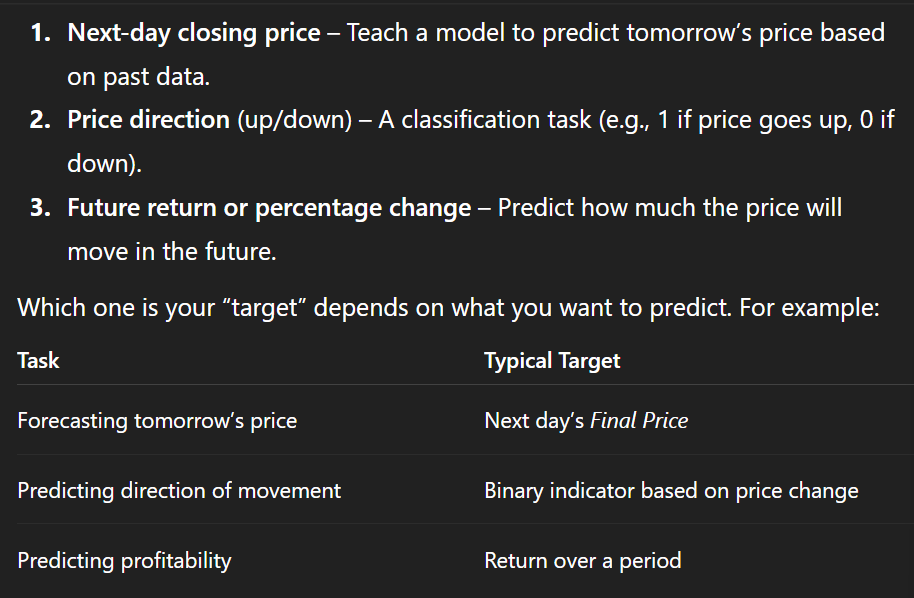

In [164]:
import pandas as pd

#IMPORT DATA FOR YEARS 2021-2024
nse_2021=pd.read_csv("./data/NSE_data_all_stocks_2021_upto_31dec2021.csv")
nse_2022=pd.read_csv("./data/NSE_data_all_stocks_2022.csv")
nse_2023=pd.read_csv("./data/NSE_data_all_stocks_2023.csv")
nse_2024=pd.read_csv("./data/NSE_data_all_stocks_2024.csv")

#import sectors for each year
sectors_21=pd.read_csv("./data/NSE_data_stock_market_sectors_as_at_31dec2021.csv")
sectors_22=pd.read_csv("./data/NSE_data_stock_market_sectors_2022.csv")
sectors_2324=pd.read_csv("./data/NSE_data_stock_market_sectors_2023_2024.csv")


In [169]:
print("______________________________________________________")
print("The column for the stocks 2021-2024:")
print("______________________________________________________")
print(nse_2021.columns)
print(nse_2022.columns)
print(nse_2023.columns)
print(nse_2024.columns)
print("______________________________________________________")
print("The column for the sectors 2021-2024")
print("______________________________________________________")
print(sectors_21.columns)
print(sectors_22.columns)
print(sectors_2324.columns)
print("______________________________________________________")


______________________________________________________
The column for the stocks 2021-2024:
______________________________________________________
Index(['DATE', 'CODE', 'NAME', '12m Low', '12m High', 'Day Low', 'Day High',
       'Day Price', 'Previous', 'Change', 'Change%', 'Volume', 'Adjust'],
      dtype='object')
Index(['Date', 'Code', 'Name', '12m Low', '12m High', 'Day Low', 'Day High',
       'Day Price', 'Previous', 'Change', 'Change%', 'Volume',
       'Adjusted Price'],
      dtype='object')
Index(['Date', 'Code', 'Name', '12m Low', '12m High', 'Day Low', 'Day High',
       'Day Price', 'Previous', 'Change', 'Change%', 'Volume',
       'Adjusted Price'],
      dtype='object')
Index(['Date', 'Code', 'Name', '12m Low', '12m High', 'Day Low', 'Day High',
       'Day Price', 'Previous', 'Change', 'Change%', 'Volume',
       'Adjusted Price'],
      dtype='object')
______________________________________________________
The column for the sectors 2021-2024
________________________

In [ ]:
#rename columns so they match for merging
def clean_stock_columns(df):
    df = df.rename(columns={
        'DATE': 'Date',
        'CODE': 'Code',
        'NAME': 'Name',
        'Adjust': 'Adjusted Price'
    })
    
    return df


# Apply to each year's dataframe
nse_2021 = clean_stock_columns(nse_2021)
nse_2022 = clean_stock_columns(nse_2022)
nse_2023 = clean_stock_columns(nse_2023)
nse_2024 = clean_stock_columns(nse_2024)

#apply to sector
sectors_21= clean_stock_columns()
sectors_22=clean_stock_columns()
sectors_2324=clean_stock_columns()


In [171]:
#combine and merge tables with their sectors
df_2021=nse_2021.merge(sectors_21,on="Code",how="left")
df_2022=nse_2022.merge(sectors_22,on="Code",how="left")
df_2023=nse_2023.merge(sectors_2324,on="Code",how="left")
df_2024=nse_2024.merge(sectors_2324,on="Code",how="left")




KeyError: 'Code'

In [147]:
nse_all = pd.concat([nse_2023, nse_2024], ignore_index=True)
nse_all

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
0,3-Jan-23,EGAD,Eaagads Ltd,10.35,14.5,10.5,10.5,10.5,10.5,-,-,"1,900.00",-
1,3-Jan-23,KUKZ,Kakuzi Plc,342,440,385,385,385,385,-,-,-,-
2,3-Jan-23,KAPC,Kapchorua Tea Kenya Plc,207,280,115.75,115.75,115.75,113.25,2.5,2.21%,100,-
3,3-Jan-23,LIMT,Limuru Tea Plc,365,380,420,420,420,420,-,-,-,-
4,3-Jan-23,SASN,Sasini Plc,15.1,22,22,22.5,22.45,22.45,-,-,"6,900.00",-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35388,31-Dec-24,^N25I,NSE 25-Share Index,2364.29,"3,457.87","3,402.80","3,402.80","3,402.80","3,380.24",22.56,0.67%,-,-
35389,31-Dec-24,^NASI,NSE All-Share Index,90.1,125.34,123.48,123.48,123.48,123.12,0.36,0.29%,-,-
35390,31-Dec-24,^NBDI,NSE Bonds Index,986.46,"1,108.71","1,107.41","1,107.41","1,107.41","1,093.87",13.54,1.24%,-,-
35391,31-Dec-24,^ZKEQTK,Zamara Kenya Equity Index (KES),1535.23,"2,547.58","2,519.80","2,519.80","2,519.80","2,495.28",24.52,0.98%,-,-


In [149]:
nse_all.head()

,Date,Stock_code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
0,3-Jan-23,EGAD,Eaagads Ltd,10.35,14.5,10.5,10.5,10.5,10.5,-,-,"1,900.00",-
1,3-Jan-23,KUKZ,Kakuzi Plc,342,440,385,385,385,385,-,-,-,-
2,3-Jan-23,KAPC,Kapchorua Tea Kenya Plc,207,280,115.75,115.75,115.75,113.25,2.5,2.21%,100,-
3,3-Jan-23,LIMT,Limuru Tea Plc,365,380,420,420,420,420,-,-,-,-
4,3-Jan-23,SASN,Sasini Plc,15.1,22,22,22.5,22.45,22.45,-,-,"6,900.00",-


In [150]:
nse_df=nse_all.merge(sectors,on="Stock_code",how="left")

nse_df.head()

,Date,Stock_code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price,Sector,Stock_name
0,3-Jan-23,EGAD,Eaagads Ltd,10.35,14.5,10.5,10.5,10.5,10.5,-,-,"1,900.00",-,Agricultural,Eaagads Ltd
1,3-Jan-23,KUKZ,Kakuzi Plc,342,440,385,385,385,385,-,-,-,-,Agricultural,Kakuzi Plc
2,3-Jan-23,KAPC,Kapchorua Tea Kenya Plc,207,280,115.75,115.75,115.75,113.25,2.5,2.21%,100,-,Agricultural,Kapchorua Tea Kenya Plc
3,3-Jan-23,LIMT,Limuru Tea Plc,365,380,420,420,420,420,-,-,-,-,Agricultural,Limuru Tea Plc
4,3-Jan-23,SASN,Sasini Plc,15.1,22,22,22.5,22.45,22.45,-,-,"6,900.00",-,Agricultural,Sasini Plc


In [151]:
nse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35393 entries, 0 to 35392
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35393 non-null  object
 1   Stock_code      35393 non-null  object
 2   Name            35393 non-null  object
 3   12m Low         35393 non-null  object
 4   12m High        35393 non-null  object
 5   Day Low         35393 non-null  object
 6   Day High        35393 non-null  object
 7   Day Price       35393 non-null  object
 8   Previous        35393 non-null  object
 9   Change          35393 non-null  object
 10  Change%         35393 non-null  object
 11  Volume          35393 non-null  object
 12  Adjusted Price  35393 non-null  object
 13  Sector          35202 non-null  object
 14  Stock_name      35202 non-null  object
dtypes: object(15)
memory usage: 4.1+ MB


In [152]:
nse_df.isna().sum()

Date                0
Stock_code          0
Name                0
12m Low             0
12m High            0
Day Low             0
Day High            0
Day Price           0
Previous            0
Change              0
Change%             0
Volume              0
Adjusted Price      0
Sector            191
Stock_name        191
dtype: int64

In [153]:
nse_df.duplicated().sum()

0

In [154]:
nse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35393 entries, 0 to 35392
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35393 non-null  object
 1   Stock_code      35393 non-null  object
 2   Name            35393 non-null  object
 3   12m Low         35393 non-null  object
 4   12m High        35393 non-null  object
 5   Day Low         35393 non-null  object
 6   Day High        35393 non-null  object
 7   Day Price       35393 non-null  object
 8   Previous        35393 non-null  object
 9   Change          35393 non-null  object
 10  Change%         35393 non-null  object
 11  Volume          35393 non-null  object
 12  Adjusted Price  35393 non-null  object
 13  Sector          35202 non-null  object
 14  Stock_name      35202 non-null  object
dtypes: object(15)
memory usage: 4.1+ MB


In [155]:
nse_df.describe()

,Date,Stock_code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price,Sector,Stock_name
count,35393,35393,35393,35393,35393,35393,35393,35393,35393,35393,35393,35393,35393,35202,35202
unique,492,74,74,172,238,4993,4941,5312,5305,2123,1889,4453,1,13,72
top,20-Nov-24,EGAD,Eaagads Ltd,0.27,6,20,6,20,20,-,-,-,-,Commercial and Services,Eaagads Ltd
freq,74,492,492,973,907,745,682,648,646,14124,14149,12894,35393,6396,492


In [156]:
nse_df.columns

Index(['Date', 'Stock_code', 'Name', '12m Low', '12m High', 'Day Low',
       'Day High', 'Day Price', 'Previous', 'Change', 'Change%', 'Volume',
       'Adjusted Price', 'Sector', 'Stock_name'],
      dtype='object')

In [157]:
#drop the redundant column "Stock_name"
nse_df = nse_df.drop(columns=['Stock_name'])


**Date** – The calendar day of the trading information.

**Stock Code** – A unique identifier (ticker) for the stock.

**Stock Name** – The company’s name.

**12-month Low price** – The lowest price the stock traded at over the last 12 months.

**12-month High price** – The highest price over the last 12 months.

**Day’s Low price**– Lowest price the stock traded at on that day.

**Day’s High price** – Highest price on that day.

**Day’s Final Price** – Closing price that day.

**Previous traded price** – Closing price from the previous trading day.

**Change in price value** – Difference between today’s and previous day’s price.

**Change in price %** – Percentage change.

**Volume traded** – Number of shares traded that day.

**Adjusted price** – Price adjusted for corporate actions (like dividends, splits).

**Sector** -the sector the company belongs to



## CLEANING 
Steps:
 -convert dates to datetime

 -extract month and year 

 -sort time-series logic

 -standadize column names

 

In [158]:
#convert dates to datetime
nse_df["Date"]=pd.to_datetime(nse_df["Date"])


C:\Users\User\AppData\Local\Temp\ipykernel_1532\859318866.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nse_df["Date"]=pd.to_datetime(nse_df["Date"])


In [159]:
#extract month and year
nse_df["Month"]= nse_df["Date"].dt.month

nse_df["Year"]= nse_df["Date"].dt.year

In [160]:
#sort time series logic
nse_df=nse_df.sort_values(["Stock_code","Date"])
nse_df.head()

,Date,Stock_code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price,Sector,Month,Year
7,2023-01-03,ABSA,ABSA Bank Kenya Plc,10.55,16.7,12.1,12.45,12.2,12.3,-0.1,-0.81%,"134,300.00",-,Banking,1,2023
77,2023-01-04,ABSA,ABSA Bank Kenya Plc,10.55,16.7,12,12.2,12.1,12.2,-0.1,-0.82%,"106,300.00",-,Banking,1,2023
147,2023-01-05,ABSA,ABSA Bank Kenya Plc,10.55,16.7,12,12.2,12.05,12.1,-0.05,-0.41%,"2,830,100.00",-,Banking,1,2023
217,2023-01-06,ABSA,ABSA Bank Kenya Plc,10.55,16.7,12.05,12.25,12.05,12.05,-,-,"6,611,900.00",-,Banking,1,2023
287,2023-01-09,ABSA,ABSA Bank Kenya Plc,10.55,16.7,12.05,12.2,12.1,12.05,0.05,0.41%,"168,200.00",-,Banking,1,2023


In [ ]:
#standardize column names


# Example
nse_df.columns = (
    nse_df.columns
      .str.strip()              # remove leading/trailing spaces
      .str.lower()              # convert to lowercase
      .str.replace(' ', '_')    # replace spaces with underscore
      .str.replace('%', '_percent')
      .str.replace('[^a-z0-9_]', '', regex=True)  # remove special characters
)


print(nse_df.columns)



Index(['date', 'stock_code', 'name', '12m_low', '12m_high', 'day_low',
       'day_high', 'day_price', 'previous', 'change', 'change_percent',
       'volume', 'adjusted_price', 'sector', 'month', 'year'],
      dtype='object')
